In [1]:
# cnn model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import keras
import sklearn
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
try: from sklearn.model_selection import train_test_split
except: from sklearn.cross_validation import train_test_split
import pandas as pd
import numpy as np
from sklearn import datasets
import sys
sys.path.insert(0,'..')

from time import time
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [2]:
def evaluate(y_test,m):
    #evaluate results
    mse=sklearn.metrics.mean_squared_error(y_test,m)
    mabs=sklearn.metrics.mean_absolute_error(y_test,m)
    exvar=sklearn.metrics.explained_variance_score(y_test,m)   
    print('Mean Squa Error :',mse)
    print('Mean Abso Error :',mabs)
    print('Expl. Variance  :',exvar,'\n')

### Read the train & test and preprocessing

In [3]:
# load data
import pandas as pd
# load data
df=pd.read_csv('qsar_fish_toxicity.csv', sep=';', header = None)

# drop nan 
df = df.dropna()
# the head of df
df.head()

,0,1,2,3,4,5,6
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [4]:
df.shape

(908, 7)

In [5]:
# df to values
df = df.values
Y = df[:,6]
X = df[:,0:6]

X = X.reshape(X.shape[0], X.shape[1], 1)
print(X.shape)

x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.2, random_state=1) 
x_train_, x_test_, y_train_, y_test_ = x_train, x_test, y_train, y_test

(908, 6, 1)


In [6]:
def standardize(train, test):

    mean = np.mean(train, axis=0)
    std = np.std(train, axis=0)+0.000001

    X_train = (train - mean) / std
    X_test = (test - mean) /std
    return X_train, X_test

x_train, x_test = standardize(x_train, x_test)

In [7]:
x_test.shape

(182, 6, 1)

In [8]:
# print(np.any(np.isnan(X_test)))
# print(np.any(np.isnan(y_test)))

### Creation structure of CNN

In [9]:
# build CNN
def CNN_net():
    
    model = Sequential()
    model.add(Conv1D(64, 3, activation="relu", input_shape=(X.shape[1],1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.5))
    
#     model.add(Conv1D(128, 3, activation='relu'))
#     model.add(MaxPooling1D(pool_size=2))
#     model.add(Dropout(0.5))    
    
    
    model.add(Flatten())
    #model.add(Dense(64, activation="relu"))
    model.add(Dense(1))
    model.compile(loss="mse", optimizer="adam")
    
    return model

In [10]:
# Parametres
verbose, epochs, batch_size = 1, 250, 5
# initialize the model object
clf_cnn = CNN_net()
# fit network #Train the model using tensorboard instance in the callbacks
history = clf_cnn.fit(x_train, y_train, batch_size=batch_size,
          epochs=epochs, verbose=verbose, validation_data=(x_test, y_test))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Train on 726 samples, validate on 182 samples
Epoch 1/250
726/726 [==============================] - 1s 1ms/step - loss: 9.7370 - val_loss: 2.5732
Epoch 2/250
726/726 [==============================] - 0s 302us/step - loss: 2.7061 - val_loss: 1.7724
Epoch 3/250
726/726 [==============================] - 0s 295us/step - loss: 2.0098 - val_loss: 1.6076
Epoch 4/250
726/726 [==============================] - 0s 293us/step - loss: 1.8680 - val_loss: 1.4873
Epoch 5/250
726/726 [==============================] - 0s 291us/step - loss: 1.5384 - val_loss: 1.5065
Epoch 6/250
726/726 [==============================] - 0s 293us/step - loss: 1.5826 - val_loss: 1.3938
Epoch 7/250
726/726 [==============================] - 0s 276us/step - loss: 1.5555 - val_loss: 1.3431
Epoch 8/250
726/726 [==============================] - 0s 280us/step - loss: 1.5394 - val_loss: 1.2836
Epoch 9/250
726/726 [============================

726/726 [==============================] - 0s 291us/step - loss: 1.1151 - val_loss: 1.1198
Epoch 72/250
726/726 [==============================] - 0s 280us/step - loss: 1.0332 - val_loss: 1.1392
Epoch 73/250
726/726 [==============================] - 0s 277us/step - loss: 1.0590 - val_loss: 1.1198
Epoch 74/250
726/726 [==============================] - 0s 284us/step - loss: 1.0445 - val_loss: 1.2350
Epoch 75/250
726/726 [==============================] - 0s 323us/step - loss: 1.1660 - val_loss: 1.0935
Epoch 76/250
726/726 [==============================] - 0s 276us/step - loss: 1.0790 - val_loss: 1.1422
Epoch 77/250
726/726 [==============================] - 0s 302us/step - loss: 1.0460 - val_loss: 1.2245
Epoch 78/250
726/726 [==============================] - 0s 284us/step - loss: 1.0186 - val_loss: 1.1169
Epoch 79/250
726/726 [==============================] - 0s 304us/step - loss: 1.0464 - val_loss: 1.1401
Epoch 80/250
726/726 [==============================] - 0s 305us/step - loss:

726/726 [==============================] - 0s 258us/step - loss: 1.0183 - val_loss: 1.1300
Epoch 150/250
726/726 [==============================] - 0s 258us/step - loss: 0.9976 - val_loss: 1.1749
Epoch 151/250
726/726 [==============================] - 0s 284us/step - loss: 0.9928 - val_loss: 1.1428
Epoch 152/250
726/726 [==============================] - 0s 258us/step - loss: 1.0302 - val_loss: 1.1607
Epoch 153/250
726/726 [==============================] - 0s 258us/step - loss: 1.0033 - val_loss: 1.2118
Epoch 154/250
726/726 [==============================] - 0s 258us/step - loss: 1.0756 - val_loss: 1.2304
Epoch 155/250
726/726 [==============================] - 0s 258us/step - loss: 1.0252 - val_loss: 1.1598
Epoch 156/250
726/726 [==============================] - 0s 268us/step - loss: 0.9985 - val_loss: 1.1199
Epoch 157/250
726/726 [==============================] - 0s 273us/step - loss: 1.0142 - val_loss: 1.1494
Epoch 158/250
726/726 [==============================] - 0s 237us/ste

726/726 [==============================] - 0s 258us/step - loss: 0.9305 - val_loss: 1.1398
Epoch 228/250
726/726 [==============================] - 0s 280us/step - loss: 0.9833 - val_loss: 1.1336
Epoch 229/250
726/726 [==============================] - 0s 258us/step - loss: 0.9995 - val_loss: 1.1684
Epoch 230/250
726/726 [==============================] - 0s 284us/step - loss: 0.9598 - val_loss: 1.1664
Epoch 231/250
726/726 [==============================] - 0s 277us/step - loss: 0.9546 - val_loss: 1.1508
Epoch 232/250
726/726 [==============================] - 0s 258us/step - loss: 0.9769 - val_loss: 1.1356
Epoch 233/250
726/726 [==============================] - 0s 258us/step - loss: 0.9436 - val_loss: 1.1715
Epoch 234/250
726/726 [==============================] - 0s 301us/step - loss: 1.0079 - val_loss: 1.1727
Epoch 235/250
726/726 [==============================] - 0s 254us/step - loss: 0.9391 - val_loss: 1.1399
Epoch 236/250
726/726 [==============================] - 0s 258us/ste

In [11]:
ypred = clf_cnn.predict(x_test)

print(" Model.evaluate : ",clf_cnn.evaluate(x_train, y_train),'\n')

#evaluate results
mse=sklearn.metrics.mean_squared_error(y_test,ypred)
mabs=sklearn.metrics.mean_absolute_error(y_test,ypred)
exvar=sklearn.metrics.explained_variance_score(y_test,ypred)   
print('Mean Squa Error :',mse)
print('Mean Abso Error :',mabs)
print('Expl. Variance  :',exvar)

726/726 [==============================] - 0s 59us/step
 Model.evaluate :  0.8235887932711725 

Mean Squa Error : 1.1766504147325032
Mean Abso Error : 0.7574529346476545
Expl. Variance  : 0.38696777154459683


In [12]:
clf_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 4, 64)             256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2, 64)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 64)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________


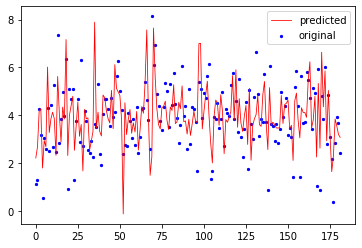

In [13]:
#https://www.datatechnotes.com/2019/12/how-to-fit-regression-data-with-cnn.html
x_ax = range(len(ypred))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

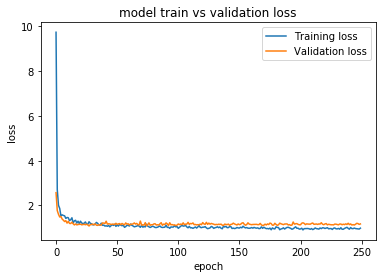

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss','Validation loss'], loc='best')
plt.show()

### Testing the Novel Approach

### Feature Extraction by CNN

In [15]:
from keras.models import Model
# from the first Fully-Connected layer 
layer_name = 'dense_1'
intermediate_layer_model = Model(inputs=clf_cnn.input,
                                 outputs=clf_cnn.get_layer(layer_name).output)

In [16]:
# Save the features of the train dataset to use it in future.
out_cnn_train = intermediate_layer_model.predict(x_train)
# Save the features of the test dataset to use it in future.
out_cnn_test = intermediate_layer_model.predict(x_test)

In [17]:
print('Training Features (from CNN) Shape:', out_cnn_train.shape)
print('Training Labels (from CNN) Shape:', y_train.shape,'\n')

print('Test Features (from CNN) Shape:', out_cnn_test.shape)
print('Test Labels (from CNN) Shape:', y_test.shape,'\n')

print('Test Features original Shape:', x_train_.shape)
print('Test Features original Shape:', x_test_.shape)

Training Features (from CNN) Shape: (726, 1)
Training Labels (from CNN) Shape: (726,) 

Test Features (from CNN) Shape: (182, 1)
Test Labels (from CNN) Shape: (182,) 

Test Features original Shape: (726, 6, 1)
Test Features original Shape: (182, 6, 1)


### Classification by CNN + Random Forest + MLP

In [18]:
from djinn import djinn
print("djinn example")    
modelname="reg_djinn_test"   # name the model
ntrees=1                 # number of trees = number of neural nets in ensemble
maxdepth=5               # max depth of tree -- optimize this for each data set
dropout_keep=1.0         # dropout typically set to 1 for non-Bayesian models

#initialize the model
model=djinn.DJINN_Regressor(ntrees,maxdepth,dropout_keep)
x_train, y_train, x_test, y_test = out_cnn_train, y_train, out_cnn_test, y_test

# find optimal settings: this function returns dict with hyper-parameters
# each djinn function accepts random seeds for reproducible behavior
optimal=model.get_hyperparameters(x_train, y_train, random_state=42)
batchsize=optimal['batch_size']
learnrate=optimal['learn_rate']
epochs=optimal['epochs']

# batchsize=304
# learnrate=0.002474296684203603
# epochs=210
 
# train the model with hyperparameters determined above
model.train(x_train,y_train,epochs=epochs,learn_rate=learnrate, batch_size=batchsize, 
              display_step=1, save_files=True, file_name=modelname, 
              save_model=True,model_name=modelname, random_state=1)

# *note there is a function model.fit(x_train,y_train, ... ) that wraps 
# get_hyperparameters() and train(), so that you do not have to manually
# pass hyperparameters to train(). However, get_hyperparameters() can
# be expensive, so I recommend running it once per dataset and using those
# hyperparameter values in train() to save computational time

# make predictions
m=model.predict(x_test) #returns the median prediction if more than one tree

#evaluate results
evaluate(y_test,m)

#close model 
model.close_model()

djinn example
Finding optimal hyper-parameters...
Determining learning rate...


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Determining number of epochs needed...



Optimal learning rate:  0.0027941586783753235
Optimal # epochs:  220
Optimal batch size:  37



Epoch: 0001 cost= 0.019487785
Epoch: 0002 cost= 0.015071467
Epoch: 0003 cost= 0.012858395
Epoch: 0004 cost= 0.010692656
Epoch: 0005 cost= 0.008691491
Epoch: 0006 cost= 0.010615445
Epoch: 0007 cost= 0.008955885
Epoch: 0008 cost= 0.009618823
Epoch: 0009 cost= 0.008448854
Epoch: 0010 cost= 0.009579559
Ep

Epoch: 0212 cost= 0.009156884
Epoch: 0213 cost= 0.008481788
Epoch: 0214 cost= 0.008412007
Epoch: 0215 cost= 0.008445273
Epoch: 0216 cost= 0.007921851
Epoch: 0217 cost= 0.009185321
Epoch: 0218 cost= 0.010076925
Epoch: 0219 cost= 0.009267260
Epoch: 0220 cost= 0.008651471
Optimization Finished!
Model saved in: ./reg_djinn_test_tree0.ckpt

INFO:tensorflow:Restoring parameters from ./reg_djinn_test_tree0.ckpt
Model 0 restored
Mean Squa Error : 1.1396745026589397
Mean Abso Error : 0.7362111682734646
Expl. Variance  : 0.4097634735537927 



### Classification by CNN + ( SVM, XGB, DTree, ExtraTrees, RandomFores)


In [19]:
#https://stackoverflow.com/questions/41925157/logisticregression-unknown-label-type-continuous-using-sklearn-in-python
import numpy as np
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(gamma='scale'),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()
              ]

for item in classifiers:
    print(item,'\n')
    clf = item
    clf.fit(out_cnn_train, y_train)
    #print(clf.predict(predictionData),'\n')
    #Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
    m = clf.predict(out_cnn_test)
    #evaluate results
    mse=sklearn.metrics.mean_squared_error(y_test,m)
    mabs=sklearn.metrics.mean_absolute_error(y_test,m)
    exvar=sklearn.metrics.explained_variance_score(y_test,m)   
    print('Mean Squa Error :',mse)
    print('Mean Abso Error :',mabs)
    print('Expl. Variance  :',exvar,'\n')
    print("================================================================================")

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 

Mean Squa Error : 1.0028292510416181
Mean Abso Error : 0.6969977880939956
Expl. Variance  : 0.48070495299962723 

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False) 

Mean Squa Error : 1.2528304325070787
Mean Abso Error : 0.7764602646401114
Expl. Variance  : 0.37361885085804547 

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False) 

Mean S

In [20]:
#Feed the extracted features with the labels to RANDOM FOREST 
from xgboost import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(out_cnn_train, y_train , verbose=False)
# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(out_cnn_test)
print('CNN XGBRegressor      ')
evaluate(y_test,XGBpredictions)

    
from sklearn.ensemble import ExtraTreesRegressor
Ext = ExtraTreesRegressor(n_estimators=10)
Ext.fit(out_cnn_train, y_train)
#Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
predictionsCNN_Ext = Ext.predict(out_cnn_test)
print('CNN ExtraTreesRegressor      ')
evaluate(y_test,predictionsCNN_Ext)


from sklearn import tree
clf_dt = tree.DecisionTreeRegressor()
clf_dt.fit(out_cnn_train, y_train)
# Get the mean absolute error on the validation data :
clf_dtpredictions = clf_dt.predict(out_cnn_test)
print('CNN DecisionTreeRegressor      ')
evaluate(y_test,clf_dtpredictions)

CNN XGBRegressor      
Mean Squa Error : 1.3196314151543835
Mean Abso Error : 0.8455447478634971
Expl. Variance  : 0.3270072213574784 

CNN ExtraTreesRegressor      
Mean Squa Error : 1.5830243598620142
Mean Abso Error : 0.9273054160125589
Expl. Variance  : 0.19493267298354566 

CNN DecisionTreeRegressor      
Mean Squa Error : 1.740058462416056
Mean Abso Error : 0.9819784798534797
Expl. Variance  : 0.10933088086725506 



In [21]:
out_cnn_train.shape

(726, 1)

###  MLP

In [22]:
# Regression Example With Boston Dataset: Baseline
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier


def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(128, input_dim=out_cnn_train.shape[1], kernel_initializer='normal', activation='relu'))
	model.add(Dense(64, activation='relu'))
	model.add(Dense(1, kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model


clf_MLP = KerasClassifier(build_fn = baseline_model, epochs = 50, batch_size=5, verbose=1)
clf_MLP.fit(out_cnn_train, y_train)
y_predmlp = clf_MLP.predict(out_cnn_test)

#print("CNN MLP Model.evaluate : ",clf_MLP.evaluate(out_cnn_test, y_train),'\n')
#evaluate results
mse=sklearn.metrics.mean_squared_error(y_test,y_predmlp)
mabs=sklearn.metrics.mean_absolute_error(y_test,y_predmlp)
exvar=sklearn.metrics.explained_variance_score(y_test,y_predmlp)   
print('CNN MLP Mean Squa Error :',mse)
print('CNN MLP Mean Abso Error :',mabs)
print('CNN MLP Expl. Variance  :',exvar)



Epoch 1/50
726/726 [==============================] - 0s 541us/step - loss: 136163.1854
Epoch 2/50
726/726 [==============================] - 0s 213us/step - loss: 40139.0670
Epoch 3/50
726/726 [==============================] - 0s 235us/step - loss: 19993.1677
Epoch 4/50
726/726 [==============================] - 0s 214us/step - loss: 19794.8293
Epoch 5/50
726/726 [==============================] - 0s 234us/step - loss: 19674.0427
Epoch 6/50
726/726 [==============================] - 0s 221us/step - loss: 19412.5128
Epoch 7/50
726/726 [==============================] - 0s 237us/step - loss: 19247.8487
Epoch 8/50
726/726 [==============================] - 0s 250us/step - loss: 19064.6344
Epoch 9/50
726/726 [==============================] - 0s 211us/step - loss: 18791.1487
Epoch 10/50
726/726 [==============================] - 0s 219us/step - loss: 18651.9327
Epoch 11/50
726/726 [==============================] - 0s 231us/step - loss: 18388.3673
Epoch 12/50
726/726 [=================

C:\Users\a.berrouachedi\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.120246). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


726/726 [==============================] - 0s 228us/step - loss: 14889.5764
Epoch 42/50
726/726 [==============================] - 0s 237us/step - loss: 14972.0761
Epoch 43/50
726/726 [==============================] - 0s 219us/step - loss: 14911.3568
Epoch 44/50
726/726 [==============================] - 0s 253us/step - loss: 14871.1269
Epoch 45/50
726/726 [==============================] - 0s 205us/step - loss: 14890.5891
Epoch 46/50
726/726 [==============================] - 0s 256us/step - loss: 14843.8831
Epoch 47/50
726/726 [==============================] - 0s 201us/step - loss: 14824.5605
Epoch 48/50
726/726 [==============================] - 0s 210us/step - loss: 14915.8649
Epoch 49/50
726/726 [==============================] - 0s 342us/step - loss: 14819.5869
Epoch 50/50
182/182 [==============================] - 0s 416us/step
CNN MLP Mean Squa Error : 16.117302065934062
CNN MLP Mean Abso Error : 3.7693296703296704
CNN MLP Expl. Variance  : 0.001554840457588802


### Classification by RandomForest, ExtraTrees, XGBRegressor

In [23]:
x_train_ = x_train_.reshape(x_train_.shape[0], x_train_.shape[1])
x_test_  = x_test_.reshape(x_test_.shape[0], x_test_.shape[1])

In [24]:
# RandomForestClassifier : from dataset originl
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train_, y_train_)
predictions = rf.predict(x_test_)
print('CNN RandomForestRegressor      ')
evaluate(y_test_,predictions)


#Feed the extracted features with the labels to RANDOM FOREST 
from xgboost import XGBRegressor
XGBModel = XGBRegressor()
XGBModel.fit(x_train_, y_train_ , verbose=False)
# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(x_test_)
print('CNN XGBRegressor      ')
evaluate(y_test_,XGBpredictions)

    
from sklearn.ensemble import ExtraTreesRegressor
Ext = ExtraTreesRegressor(n_estimators=10)
Ext.fit(x_train_, y_train_)
#Feed the features of the test to ExtraTreesClassifier Classifier to predict its class
predictionsCNN_Ext = Ext.predict(x_test_)
print('CNN ExtraTreesRegressor      ')
evaluate(y_test_,predictionsCNN_Ext)

CNN RandomForestRegressor      
Mean Squa Error : 0.9271511900891092
Mean Abso Error : 0.672556690526964
Expl. Variance  : 0.519473311562582 

CNN XGBRegressor      
Mean Squa Error : 1.0821057183292784
Mean Abso Error : 0.7319394397499797
Expl. Variance  : 0.4364850648225346 

CNN ExtraTreesRegressor      
Mean Squa Error : 0.9297100506818841
Mean Abso Error : 0.6841619636316065
Expl. Variance  : 0.5207827375966139 

